<a href="https://colab.research.google.com/github/kelvin-Ferreira/Analise-de-sinais-e-sistemas-/blob/main/EquacoesDiferenciais(TempoDiscreto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solução Pelo Metodo Iterativo

Equação diferencial:
y(n) -(3/4)*y(n-1)+(1/8)*y(n-2) = 2sen(n*pi/2) + sen((n-1)*pi/2)

Aproximações iniciais:
y(-1) = 2 e y(-2) = 4

Para o intervalo:
0 <= n <= 15

Lista de soluções para y(n) (Pelo Metodo iterativo):

[0, 1.75000000000000, 2.31250000000000, -0.484375000000000, -1.65234375000000, 0.821289062500000, 1.82250976562500, -0.735778808593750, -1.77964782714844, 0.757236480712891, 1.79038333892822, -0.751867055892944, -1.78769820928574, 0.753209725022316, 1.78836956992745, -0.752874038182199] 



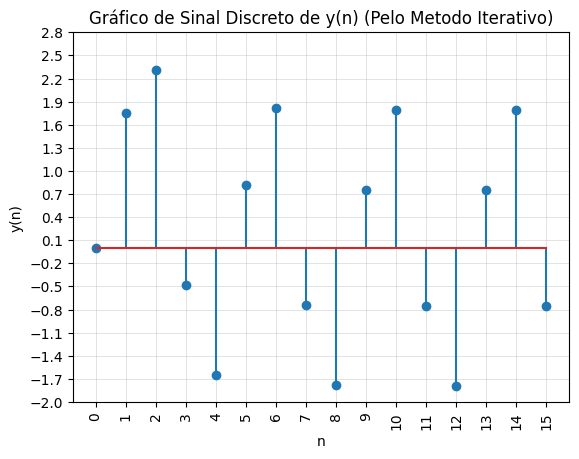

Solução Pelo Metodo Analítico

Solução Particular:

Subistituindo os valores em yP(n)
A*sin(pi*n/2) + A*sin(pi*(n/2 - 1))/8 - 3*A*sin(pi*(n/2 - 1/2))/4 - A*cos(pi*n/2)/2 - A*cos(pi*(n/2 - 1))/16 + 3*A*cos(pi*(n/2 - 1/2))/8 + B*sin(pi*n/2)/2 + B*sin(pi*(n/2 - 1))/16 - 3*B*sin(pi*(n/2 - 1/2))/8 + B*cos(pi*n/2) + B*cos(pi*(n/2 - 1))/8 - 3*B*cos(pi*(n/2 - 1/2))/4
Reescrevemos a função yP(n) levando em conta que:
sin(n-1*pi/2) = -cos(n*pi/2)
cos(n-1*pi/2) = sin(n*pi/2)

Temos: y(n)P = A*sin(n*pi/2) - A*sin(n*pi/2)/8 + 3*A*cos(n*pi/2)/4 - A*cos(n*pi/2)/2 + A*cos(n*pi/2)/16 + 3*A*sin(n*pi/2)/8 + B*sin(n*pi/2)/2 - B*sin(n*pi/2)/16 + 3*B*cos(n*pi/2)/8 + B*cos(pi*n/2) - B*cos(n*pi/2)/8 - 3*B*sin(n*pi/2)/4
Simplificamos para: (5/4)*A*sin(n*pi/2) - (5/16)*B*sin(n*pi/2) + (5/16)*A*cos(n*pi/2) + (5/4)*B*cos(n*pi/2)
Tambem temos: x(n)P = 2*sin(n*pi/2) - cos(n*pi/2)

por fim, isolando sen(n*pi/2) e cos(n*pi/2) teremos:
(5/4)*A - (5/16)*B = 2
(5/16)*A + (5/4)*B = -1

Resolvendo o sistema linear teremos

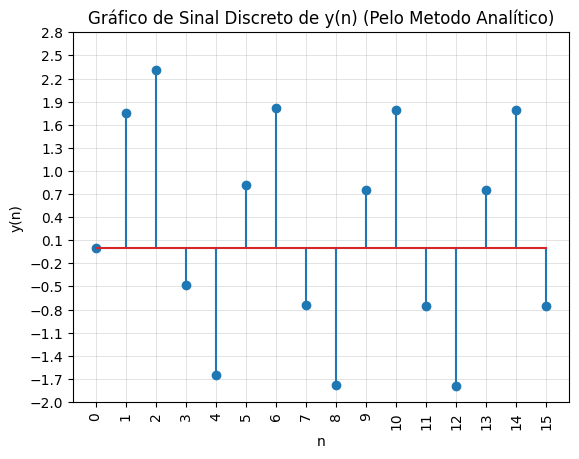

Erro relativo no intervalo (0 <= n <= 15):

[1.00000000000000, 0, 1.92038577232460e-16, 1.14603667058081e-16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 



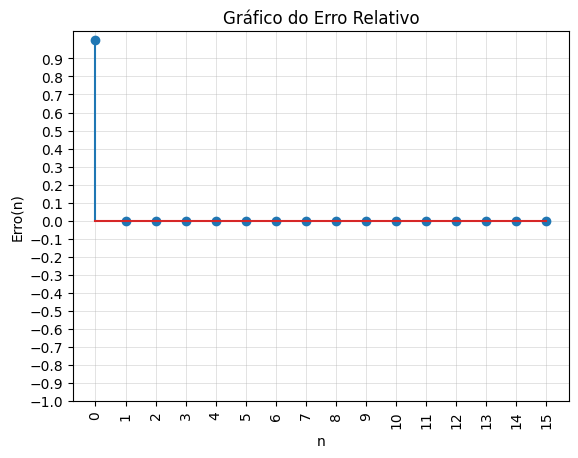

OBS: Em n = 0 podemos observar uma aparente discrepancia no caluclo do erro,
que acontece pois y[0] = 0 e y2[0] = 3.33066907387547e-16 que mesmo sendo bem proximo de 0,
no calculo do erro relativo acabamos com (y2[0]-0)/y[0] = 1.



In [80]:
# Solução Pelo Metodo Iterativo

import numpy as np
from sympy import symbols
import sympy as sp
from sympy import *
from sympy.matrices import Matrix
import matplotlib.pyplot as plt

print('Solução Pelo Metodo Iterativo\n')
print("""\
Equação diferencial:
y(n) -(3/4)*y(n-1)+(1/8)*y(n-2) = 2sen(n*pi/2) + sen((n-1)*pi/2)\n
Aproximações iniciais:
y(-1) = 2 e y(-2) = 4\n
Para o intervalo:
0 <= n <= 15
""")
y = [None for _ in range(18)]
y[0], y[1],  = 4, 2
n = symbols('n')
x = 2*sp.sin(n*sp.pi/2)

for i in range(16) :
  y[i+2] = (x.subs(n,i)) + (1/2)*(x.subs(n,i-1)) + (3/4)*y[i+1] - (1/8)*y[i]

y = y[2:]

print('Lista de soluções para y(n) (Pelo Metodo iterativo):\n')
print(y,'\n')

plt.stem(np.arange(0, 16, 1), y)
plt.xlabel('n')
plt.ylabel('y(n)')
plt.title('Gráfico de Sinal Discreto de y(n) (Pelo Metodo Iterativo)')
plt.grid(linewidth=0.5, alpha=0.5)
plt.xticks(np.arange(0, 16, 1), rotation=90)
plt.yticks(np.arange(-2, 3, 0.3))
plt.show()

print('Solução Pelo Metodo Analítico\n')

w0 = sp.pi/2
A, B, n, A1, A2 = symbols('A B n A1 A2')
yP = A*sp.sin(n*w0) + B*sp.cos(n*w0) + (1/2)*(-A*sp.cos(n*w0) + B*sp.sin(n*w0))
print('Solução Particular:\n')
print('Subistituindo os valores em yP(n)')
yPn = yP - (3/4)*yP.subs(n, n-1) + (1/8)*yP.subs(n, n-2)
print(nsimplify(yPn))

print("""\
Reescrevemos a função yP(n) levando em conta que:
sin(n-1*pi/2) = -cos(n*pi/2)
cos(n-1*pi/2) = sin(n*pi/2)\n
Temos: y(n)P = A*sin(n*pi/2) - A*sin(n*pi/2)/8 + 3*A*cos(n*pi/2)/4 - A*cos(n*pi/2)/2 + A*cos(n*pi/2)/16 + 3*A*sin(n*pi/2)/8 + B*sin(n*pi/2)/2 - B*sin(n*pi/2)/16 + 3*B*cos(n*pi/2)/8 + B*cos(pi*n/2) - B*cos(n*pi/2)/8 - 3*B*sin(n*pi/2)/4
Simplificamos para: (5/4)*A*sin(n*pi/2) - (5/16)*B*sin(n*pi/2) + (5/16)*A*cos(n*pi/2) + (5/4)*B*cos(n*pi/2)
Tambem temos: x(n)P = 2*sin(n*pi/2) - cos(n*pi/2)\n
por fim, isolando sen(n*pi/2) e cos(n*pi/2) teremos:
(5/4)*A - (5/16)*B = 2
(5/16)*A + (5/4)*B = -1\n
Resolvendo o sistema linear teremos:
A = 112/85; B = -96/85\n\
""")

yPn = yP.subs({A: 112/85, B: -96/85})
print('Solução particular:\n', nsimplify(yPn.doit()))
print('\n')

print("""\
Solução Homogênea:
Para a equação homogênea, yH(n) = y(n) - (3/4)*y(n-1) + (1/8)*y(n-2) = 0\n
Polinômio característico:
1 - (3/4)*α**-1 + (1/8)*α**-2 = 0\n
Multiplicamos os dois lados por α**2 e teremos:
α**2 - (3/4)*α + 1/8 = 0\n
Por fim, calculando as raízes da função, teremos:
α1 = 1/2 e α2 = 1/4\n
Duas raízes distintas, portanto a solução homogênea será:
A1*(α1)**n + A2*(α2)**n -> A1*(1/2)**n + A2*(1/4)**n\n
A solução total será então:
""")

yHn = A1*(1/2)**n + A2*(1/4)**n
yTn = yHn + yPn
print('yT(n) = yH(n) + yP(n) ->',nsimplify(yTn), '\n')

print('Determinamos o valor de A1 e A2 fazendo uso das condições iniciais:')
print('yT(-1) = 2 e yT(-2) = 4\n')
print(nsimplify(yTn.subs(n, -1)),'= 2')
print(nsimplify(yTn.subs(n, -2)),'= 4\n')
print('Resolvendo o sistema teremos:')
print('A1 = 11/5; A2 = -7/17\n')

print('Solução Total:\nyT(n) =', nsimplify(yTn.subs({A1 : 11/5, A2 : -7/17})))
print('\n')

y2 = [None for _ in range(16)]

for j in range(16) :
  y2[j] = (yTn.subs({A1 : 11/5, A2 : -7/17, n : j}))


print('Lista de soluções (Pelo Metodo Anaitico):\n')
print(y2,'\n')
plt.stem(np.arange(0, 16, 1), y2)
plt.xlabel('n')
plt.ylabel('y(n)')
plt.title('Gráfico de Sinal Discreto de y(n) (Pelo Metodo Analítico)')
plt.grid(linewidth=0.5, alpha=0.5)
plt.xticks(np.arange(0, 16, 1), rotation=90)
plt.yticks(np.arange(-2, 3, 0.3))
plt.show()

erro = [None for _ in range(16)]

for k in range(16) :
  erro[k] = sp.Abs((y2[k]-y[k])/y2[k])

print('Erro relativo no intervalo (0 <= n <= 15):\n')
print(erro,'\n')

plt.stem(np.arange(0, 16, 1), erro)
plt.xlabel('n')
plt.ylabel('Erro(n)')
plt.title('Gráfico do Erro Relativo')
plt.grid(linewidth=0.5, alpha=0.5)
plt.xticks(np.arange(0, 16, 1), rotation=90)
plt.yticks(np.arange(-1, 1, 0.1))
plt.show()

print("""\
OBS: Em n = 0 podemos observar uma aparente discrepancia no caluclo do erro,
que acontece pois y[0] = 0 e y2[0] = 3.33066907387547e-16 que mesmo sendo bem proximo de 0,
no calculo do erro relativo acabamos com (y2[0]-0)/y[0] = 1.
""")